In [ ]:
import pandas as pd

import matplotlib.pyplot  as plt
#
import numpy as np
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D


In [ ]:
values = pd.read_csv('MEP_2.csv')
print(values.shape)
#values = values.drop(values.columns[0], axis=1)
#Удаляем дублирующий индекс
#values = values.drop(values.columns[21], axis=1) #
values.head(2)

(216, 77)


,Т,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,...,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
0,1/1/2005,1486.333333,2.62,99.4,515,1838.0,2859,386.0,148.1,80.9,...,151.5,1254.3,4298.2,3094,309,7168,9615,1624,1486.33,632.76
1,2/1/2005,1486.333333,1.23,99.1,530,1832.0,2542,357.7,184.5,89.9,...,157.5,1281.5,4373.8,2811,335,7647,9653,1905,1486.33,632.76


In [ ]:
# ['Z58','X11','Z70','X12','Z66','X26','Z11','Z21','Z9','Z10','X10','Z25','Z71','X25','Z62']
# Для инфляции
#DF_hi_korr = values[['X11','X12','X26','Z11','Z9','Z10','X10','X25','Z62']]
#print(DF_hi_korr.shape)


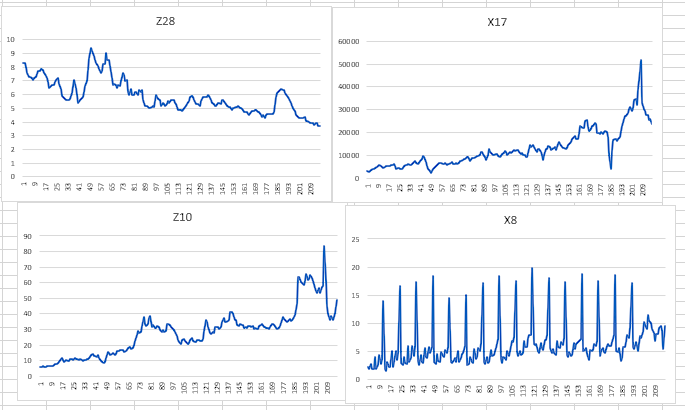

In [ ]:
#Для ВВП
#DF_hi_korr = values[['Z28','Z10','X17','X8']]

DF_hi_korr = values[['Z28','Z10','X8','X17']]
print(DF_hi_korr.shape)

(216, 4)


In [ ]:
df = DF_hi_korr

In [ ]:
DF_hi_korr = (df-df.min ())/(df.max ()-df.min ())

In [ ]:
DF_hi_korr

,Z11,Z9,Z10,X10
0,0.002478,0.000420,0.000000,0.000000
1,0.002446,0.000131,0.003468,0.017561
2,0.000000,0.000911,0.005394,0.040413
3,0.001235,0.000676,0.004881,0.033490
4,0.002615,0.000000,0.003982,0.034943
...,...,...,...,...
211,0.383233,0.501781,0.420241,0.530407
212,0.352435,0.471048,0.388775,0.499859
213,0.386762,0.475355,0.412664,0.542378
214,0.439393,0.490646,0.449139,0.537631


In [ ]:
# Сохранение датафрейма в CSV формате
DF_hi_korr.to_csv("data_VVP.csv", index=False)

In [ ]:
DF_hi_korr = pd.read_csv('data_VVP.csv')
print(DF_hi_korr.shape)
#values = values.drop(values.columns[0], axis=1)
#Удаляем дублирующий индекс
#values = values.drop(values.columns[21], axis=1) #
DF_hi_korr.head(2)

(216, 4)


,Z11,Z9,Z10,X10
0,719.38,380.19,5.87,193.752
1,719.29,378.43,6.14,230.491


In [ ]:
x_train = pd.concat([DF_hi_korr.iloc[:50] ,DF_hi_korr.iloc[100:209]])
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[50:100]

print(x_train.shape,x_test.shape)

(159, 4) (50, 4)


<Axes: >

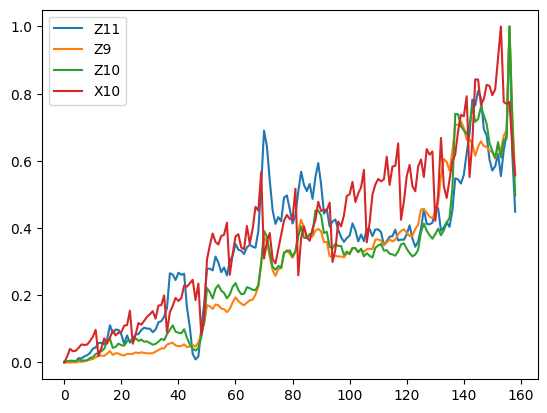

In [ ]:
x_train.plot()

<Axes: >

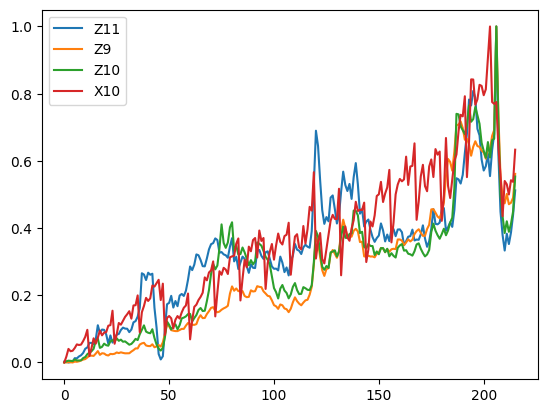

In [ ]:
DF_hi_korr.plot()

In [ ]:
y_train_VVP = pd.concat([values[4:55].filter(like='Y1'),values[105:].filter(like='Y1')])/14000
y_train_VVP = y_train_VVP.reset_index(drop=True)
# y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
# y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_VVP.shape,y_train_VVP.shape)


(162, 1) (162, 1)


In [ ]:

y_test_vvp = values[53:115].filter(like='Y1')/14000
y_test_vvp = y_test_vvp.reset_index(drop=True)
y_test_vvp.shape
# y_test_inf = values[50:95].filter(like='Y2')
# y_test_inf = y_test_inf.reset_index(drop=True)

(62, 1)

<Axes: >

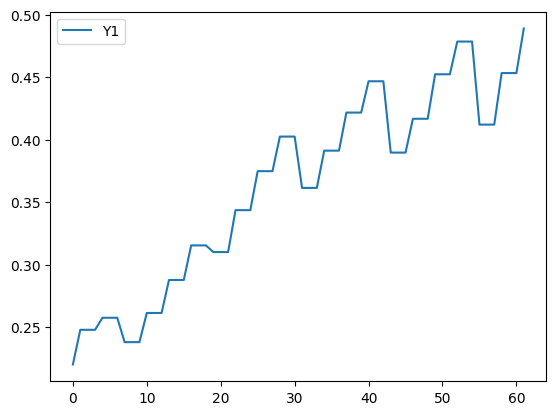

In [ ]:
y_test_vvp.plot()

In [ ]:
time_steps=3
features = 4

In [ ]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))
y_train_v = np.zeros((x_train.shape[0] - time_steps + 1))
# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values
    y_train_v[i] = y_train_VVP.iloc[i+time_steps+1:i+time_steps+2].values

print(x_train2.shape,y_train_v.shape)

(157, 3, 4) (157,)


In [ ]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))
y_test_v = np.zeros((x_test.shape[0] - time_steps + 1))
# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values
    y_test_v[i] = y_test_vvp.iloc[i+time_steps+1:i+time_steps+2].values

print(x_test2.shape, y_test_v.shape)

(48, 3, 4) (48,)


In [ ]:
model2 = Sequential()
model2.add(LSTM(units=120, input_shape=(time_steps, features)))
model2.add(Dense(units = 300))
model2.add(Dropout(0.25))
model2.add(Dense(units = 150))
model2.add(Dropout(0.15))
model2.add(Dense(units=1))
model2.compile(loss='mae', optimizer='adam')
model2.fit(x_train2, y_train_v, epochs=20, batch_size=3, validation_data=(x_test2, y_test_v))

Epoch 1/20
53/53 [==============================] - 4s 24ms/step - loss: 0.0982 - val_loss: 0.0475
Epoch 2/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0759 - val_loss: 0.0332
Epoch 3/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0716 - val_loss: 0.0308
Epoch 4/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0659 - val_loss: 0.0278
Epoch 5/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0648 - val_loss: 0.0293
Epoch 6/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0622 - val_loss: 0.0443
Epoch 7/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0667 - val_loss: 0.0685
Epoch 8/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0850 - val_loss: 0.0351
Epoch 9/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0694 - val_loss: 0.0531
Epoch 10/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0619 - val_loss: 0.0359
Epoch 11/20
53/53 

In [ ]:
model2.fit(x_train2, y_train_v, epochs=5, batch_size=43, validation_data=(x_test2, y_test_v))

Epoch 1/5
4/4 [==============================] - 0s 39ms/step - loss: 0.0550 - val_loss: 0.0287
Epoch 2/5
4/4 [==============================] - 0s 20ms/step - loss: 0.0515 - val_loss: 0.0304
Epoch 3/5
4/4 [==============================] - 0s 24ms/step - loss: 0.0495 - val_loss: 0.0333
Epoch 4/5
4/4 [==============================] - 0s 27ms/step - loss: 0.0512 - val_loss: 0.0331
Epoch 5/5
4/4 [==============================] - 0s 25ms/step - loss: 0.0510 - val_loss: 0.0316


2/2 [==============================] - 0s 7ms/step


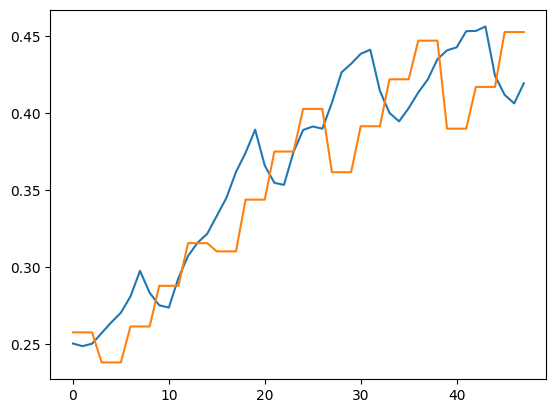

In [ ]:
pref_dfv1 = model2.predict(x_test2)
plt.plot(pref_dfv1)
plt.plot(y_test_v)

5/5 [==============================] - 0s 6ms/step


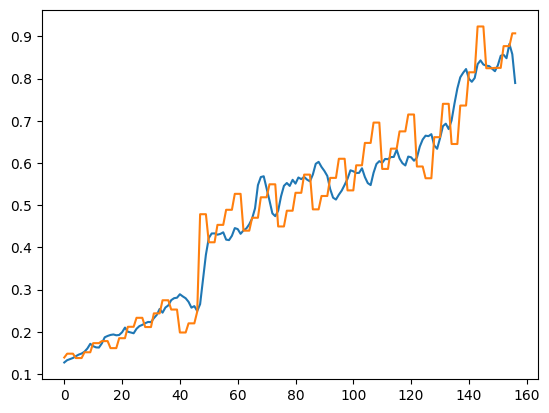

In [ ]:
pred_dfv2 = model2.predict(x_train2)
plt.plot(pred_dfv2)
plt.plot(y_train_v)

In [ ]:
model.save('my_model.h5')

In [ ]:
# Создание LSTM модели для ВВП
model_v = Sequential()
model_v.add(LSTM(30, input_shape=(time_steps, features)))

model_v.add(Dense(100))

model_v.add(Dropout(0.5))
model_v.add(Dense(50))

model_v.add(Dropout(0.5))
model_v.add(Dense(1))

# Компиляция модели
model_v.compile(optimizer='adam', loss='mae')

# Обучение модели
model_v.fit(x_train2, y_train_v, epochs=15, batch_size=16, validation_data=(x_test2, y_test_v))

Epoch 1/15
10/10 [==============================] - 3s 62ms/step - loss: 0.3001 - val_loss: 0.0604
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1484 - val_loss: 0.0535
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1120 - val_loss: 0.0357
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1126 - val_loss: 0.0723
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1019 - val_loss: 0.0365
Epoch 6/15
10/10 [==============================] - 0s 12ms/step - loss: 0.1011 - val_loss: 0.0473
Epoch 7/15
10/10 [==============================] - 0s 12ms/step - loss: 0.1002 - val_loss: 0.0278
Epoch 8/15
10/10 [==============================] - 0s 10ms/step - loss: 0.1030 - val_loss: 0.0269
Epoch 9/15
10/10 [==============================] - 0s 10ms/step - loss: 0.0981 - val_loss: 0.0424
Epoch 10/15
10/10 [==============================] - 0s 11ms/step - loss: 0.1074 - val_loss: 0.0281
Epoch 11/15
1

In [ ]:
model_v.fit(x_train2, y_train_v, epochs=15, batch_size=23, validation_data=(x_test2, y_test_v))

Epoch 1/15
7/7 [==============================] - 0s 16ms/step - loss: 0.1069 - val_loss: 0.0301
Epoch 2/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0784 - val_loss: 0.0378
Epoch 3/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0898 - val_loss: 0.0314
Epoch 4/15
7/7 [==============================] - 0s 9ms/step - loss: 0.0848 - val_loss: 0.0304
Epoch 5/15
7/7 [==============================] - 0s 9ms/step - loss: 0.0889 - val_loss: 0.0323
Epoch 6/15
7/7 [==============================] - 0s 12ms/step - loss: 0.0800 - val_loss: 0.0286
Epoch 7/15
7/7 [==============================] - 0s 9ms/step - loss: 0.0773 - val_loss: 0.0353
Epoch 8/15
7/7 [==============================] - 0s 9ms/step - loss: 0.0824 - val_loss: 0.0295
Epoch 9/15
7/7 [==============================] - 0s 9ms/step - loss: 0.0768 - val_loss: 0.0301
Epoch 10/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0732 - val_loss: 0.0289
Epoch 11/15
7/7 [=================

5/5 [==============================] - 0s 5ms/step


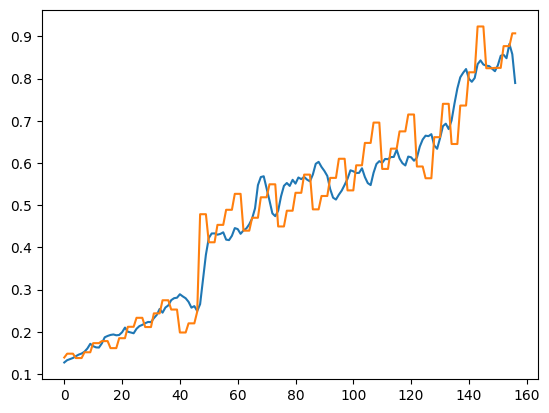

In [ ]:
pred_dfv = model_v.predict(x_train2)
df = pd.DataFrame(pred_dfv)
df2 =pd.DataFrame(pred_dfv2)
df3 =pd.DataFrame(y_train_v)

ada = pd.DataFrame (df2)

plt.plot(ada)
plt.plot(df3)

In [ ]:
model_v.save('my_model_vvp.h5')

In [ ]:
from tensorflow import keras

In [ ]:
new_model2 = keras.models.load_model('my_model_vvp.h5')
new_model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30)                4200      
                                                                 
 dense_59 (Dense)            (None, 100)               3100      
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_60 (Dense)            (None, 50)                5050      
                                                                 
 dropout_18 (Dropout)        (None, 50)                0         
                                                                 
 dense_61 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12,401
Trainable params: 12,401
Non-tra

2/2 [==============================] - 0s 11ms/step


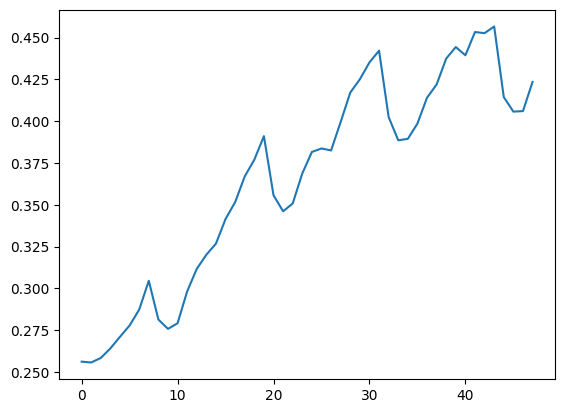

In [ ]:
att = new_model2.predict(x_test2)
plt.plot(att)

In [ ]:
att = att*12000

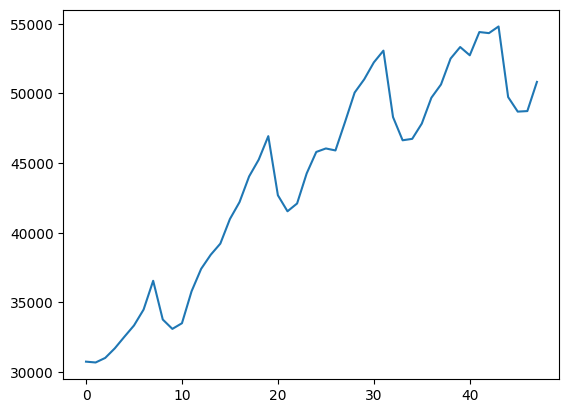

In [ ]:
plt.plot(att)

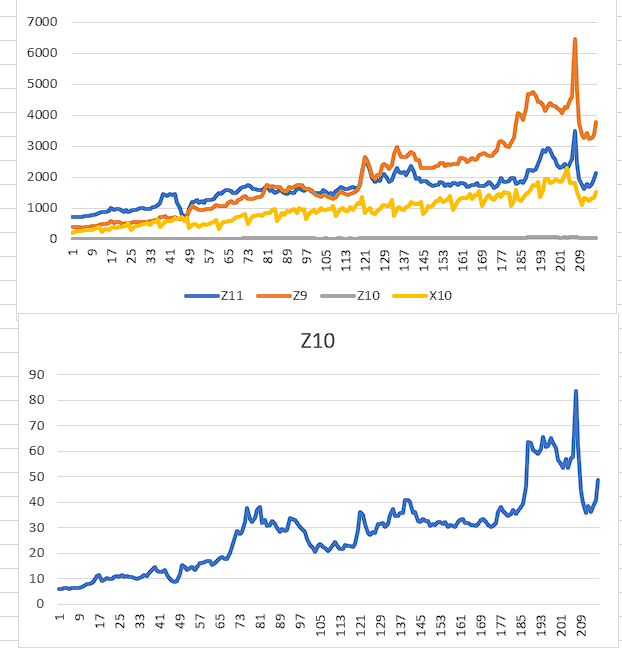

In [ ]:
# Для инфляции
DF_hi_korr = values[['Z11','Z9','Z10','X10']]
print(DF_hi_korr.shape)
df = DF_hi_korr

DF_hi_korr = (df-df.min ())/(df.max ()-df.min ())

x_train = pd.concat([DF_hi_korr.iloc[:50] ,DF_hi_korr.iloc[100:208]])
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[50:98]
x_test = x_test.reset_index(drop=True)

print(x_train.shape,x_test.shape)


(216, 4)
(158, 4) (48, 4)


In [ ]:
DF_hi_korr.head()

,Z11,Z9,Z10,X10
0,0.002478,0.000420,0.000000,0.000000
1,0.002446,0.000131,0.003468,0.017561
2,0.000000,0.000911,0.005394,0.040413
3,0.001235,0.000676,0.004881,0.033490
4,0.002615,0.000000,0.003982,0.034943


In [ ]:
# Сохранение датафрейма в CSV формате
DF_hi_korr.to_csv("data_INF.csv", index=False)

<Axes: >

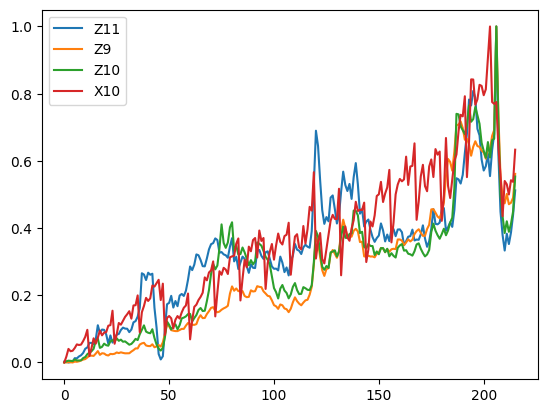

In [ ]:
DF_hi_korr.plot()

In [ ]:
# y_train_VVP = pd.concat([values[:50].filter(like='Y1'),values[105:].filter(like='Y1')])
# y_train_VVP = y_train_VVP.reset_index(drop=True)
#y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
y_train_INF = pd.concat([values[:53].filter(like='Y2')/1000,values[103:].filter(like='Y2')/1000])
y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_INF.shape)

(166, 1)


<Axes: >

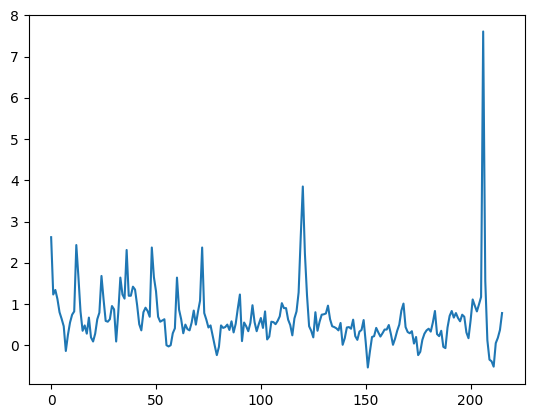

In [ ]:
values['Y2'].plot()

In [ ]:
# y_test_vvp = values[50:95].filter(like='Y1')
# y_test_vvp = y_test_vvp.reset_index(drop=True)
y_test_inf = values[50:105].filter(like='Y2')/1000
y_test_inf = y_test_inf.reset_index(drop=True)
print(y_test_vvp.shape,y_test_inf.shape)

(62, 1) (55, 1)


In [ ]:
time_steps=3
features = 4

In [ ]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))
y_train_i = np.zeros((x_train.shape[0] - time_steps + 1))
# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values
    y_train_i[i] = y_train_INF.iloc[i+time_steps+1:i+time_steps+2].values

print(x_train2.shape,y_train_i.shape)

(156, 3, 4) (156,)


In [ ]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))
y_test_i = np.zeros((x_test.shape[0] - time_steps + 1))
# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values
    y_test_i[i] = y_test_inf.iloc[i+time_steps+1:i+time_steps+2].values

print(x_test2.shape, y_test_i.shape)

(46, 3, 4) (46,)


In [ ]:
# Создание LSTM модели для Инфляции
model_i = Sequential()
model_i.add(LSTM(90, input_shape=(time_steps, features)))
model_i.add(Dense(450))
model_i.add(Dropout(0.3))
model_i.add(Dense(250))
model_i.add(Dropout(0.3))
model_i.add(Dense(100))
model_i.add(Dense(1))

# Компиляция модели
model_i.compile(optimizer='adam', loss='mse')

# Обучение модели
model_i.fit(x_train2, y_train_i, epochs=5, batch_size=7, validation_data=(x_test2, y_test_i))

Epoch 1/5
23/23 [==============================] - 4s 37ms/step - loss: 0.0100 - val_loss: 3.4567e-04
Epoch 2/5
23/23 [==============================] - 0s 8ms/step - loss: 8.0107e-04 - val_loss: 3.8462e-05
Epoch 3/5
23/23 [==============================] - 0s 9ms/step - loss: 1.6760e-04 - val_loss: 1.9690e-05
Epoch 4/5
23/23 [==============================] - 0s 8ms/step - loss: 1.1400e-04 - val_loss: 2.0532e-05
Epoch 5/5
23/23 [==============================] - 0s 9ms/step - loss: 8.6310e-05 - val_loss: 5.3438e-07


In [ ]:
# Обучение модели
model_i.fit(x_train2, y_train_i, epochs=7, batch_size=14, validation_data=(x_test2, y_test_i))

Epoch 1/7
12/12 [==============================] - 0s 14ms/step - loss: 2.9835e-05 - val_loss: 6.8771e-06
Epoch 2/7
12/12 [==============================] - 0s 10ms/step - loss: 3.5814e-05 - val_loss: 1.6040e-05
Epoch 3/7
12/12 [==============================] - 0s 10ms/step - loss: 3.4129e-05 - val_loss: 2.0436e-06
Epoch 4/7
12/12 [==============================] - 0s 10ms/step - loss: 3.3501e-05 - val_loss: 5.2884e-06
Epoch 5/7
12/12 [==============================] - 0s 10ms/step - loss: 3.4145e-05 - val_loss: 1.0877e-05
Epoch 6/7
12/12 [==============================] - 0s 9ms/step - loss: 2.8950e-05 - val_loss: 3.5758e-07
Epoch 7/7
12/12 [==============================] - 0s 9ms/step - loss: 2.1528e-05 - val_loss: 5.8916e-07


2/2 [==============================] - 0s 7ms/step


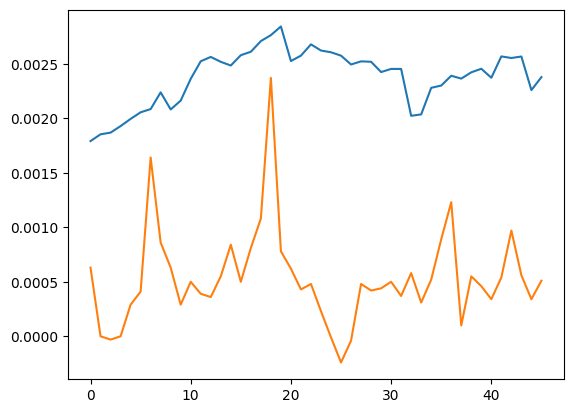

In [ ]:
pred_df_i = model_i.predict(x_test2)
plt.plot(pred_df_i)
plt.plot(y_test_i)

In [ ]:
model_i.save('model_inf.zip')

5/5 [==============================] - 0s 4ms/step


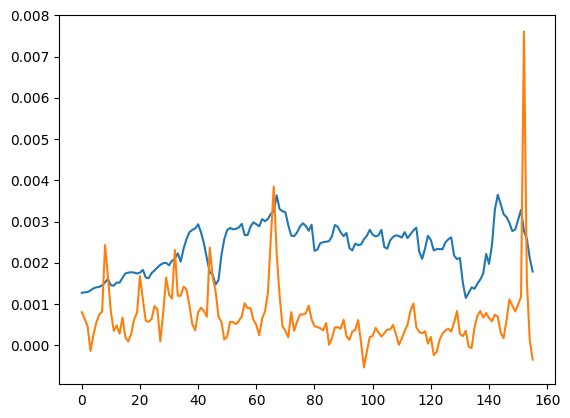

In [ ]:
pred_df_i = model_i.predict(x_train2)
plt.plot(pred_df_i)
plt.plot(y_train_i)

In [1]:
import os
import pandas as pd

import matplotlib.pyplot  as plt

import numpy as np

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D



DF_hi_korr = pd.read_csv('data_VVP.csv')
print(DF_hi_korr.shape)

#DF_hi_korr.plot()
 
df = DF_hi_korr

x_test = (df-df.min ())/(df.max ()-df.min ())

time_steps=3
features = 4


# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))

# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values



from tensorflow import keras
model_v = keras.models.load_model('my_model_vvp.h5')
model_v.summary()


pref_dfv1 = model_v.predict(x_test2)
vvp = pref_dfv1 *12000
plt.plot(vvp)
print('Предсказанные значения МЭП: ', vvp) 

(216, 4)


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.